In [55]:
import numpy as np
import synthetic_data as sd
import network_builder as nb
import networkx as nx
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from netCDF4 import Dataset
import pandas
import matplotlib.pyplot as plt

In [2]:
f_pre = Dataset('precip.mon.total.v501.nc')
pr = f_pre.variables['precip']
lon = f_pre.variables['lon'][:]
lat = f_pre.variables['lat'][:]
pr = np.swapaxes(pr,0,2)

In [ ]:
lat[99],lat[260],lon[669],lon[121]

In [3]:
data = np.concatenate((pr[669:,99:261,:], pr[:121,99:261,:]), axis=0)

In [4]:
data = np.flip(data, 1)

In [5]:
f_temp = Dataset('air.mon.mean.v501.nc')
air = f_temp.variables['air']
lon = f_temp.variables['lon'][:]
lat = f_temp.variables['lat'][:]
air = np.swapaxes(air,0,2)

In [6]:
data_air = np.concatenate((air[669:,99:261,:], air[:121,99:261,:]), axis=0)

In [7]:
data_air = np.flip(data_air, 1)

In [8]:
lat = np.flip(lat)

In [70]:
lat[242]

31.25

In [33]:
181 - 99

82

In [27]:
lon[39]

19.75

In [30]:
51+39

90

In [29]:
720 - 669

51

In [ ]:
f_temp = Dataset('air.mon.mean.v501.nc')

In [2]:
f_pre = Dataset('precipitation.nc')
#f_pre = Dataset('precip.mon.total.v501.nc')

#f_temp = Dataset('temperatureCDC.nc') 
pr = f_pre.variables['precip']
lon = f_pre.variables['lon'][:]
lat = f_pre.variables['lat'][:]
pr = np.swapaxes(pr,0,2)

In [31]:
def create_data(y, tau):
    #tau = tau + 1
    database = []
    for i in np.arange(0, len(y)):
        l = []
        for t in np.arange(0, tau):
            if (i+t) < len(y):
                a = float(y[i+t])
                l.append(a)
        if(len(l) == tau):
            database.append(np.array(l))
    return np.array(database)

In [34]:
y = data[90,82,:]

In [38]:
X = create_data(y,10)

In [36]:
X1 = create_data(data[113,144,1:],10)

In [37]:
X = np.concatenate((X,X1),axis=1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [149]:
X1.shape

(1406, 10)

In [150]:
X.shape

(1406, 30)

In [39]:
Y = y[10:]

In [40]:
X = X[:-1]

In [41]:
p = 0.8
train_size = int(len(X) * p)
test_size = len(X) - train_size

In [42]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]

In [43]:
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [69]:
clf = MLPRegressor(solver='sgd', alpha=1e-5,hidden_layer_sizes=(100,50,20, ), random_state=1)

In [70]:
clf.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [71]:
y_pred = clf.predict(X_test)

In [72]:
r2_score(Y_test,y_pred)

0.1462016103191991

In [73]:
mean_squared_error(Y_test,y_pred)

24.535317556877235

In [50]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train);

In [51]:
y_pred = rf.predict(X_test)

In [52]:
r2_score(Y_test,y_pred)

0.1368118272692851

In [53]:
mean_squared_error(Y_test,y_pred)

24.805148598612924

In [63]:
x = np.arange(200)

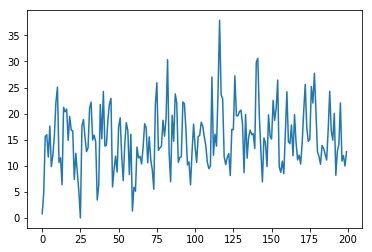

In [64]:
plt.plot(x,y[:200])
plt.show()